In [145]:
import pandas as pd
import numpy as np
from scipy import stats

### Loading Data

In [146]:
covid_data_path = "../../data/time_series_covid19_deaths_US.csv"

In [147]:
covid_data_df = pd.read_csv(covid_data_path)

In [148]:
covid_data_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,115,117,122,122,123,124,124,125,126,126
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [149]:
list(covid_data_df.columns)

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 'Population',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 

In [150]:
covid_data_df.Combined_Key.head()

0              American Samoa, US
1                        Guam, US
2    Northern Mariana Islands, US
3                 Puerto Rico, US
4              Virgin Islands, US
Name: Combined_Key, dtype: object

In [151]:
num_samples = len(covid_data_df)

### Detecting Duplicates

In [152]:
duplicated_all_columns = covid_data_df.duplicated(subset=None, keep='first')

In [153]:
duplicated_all_columns.sum()

0

In [154]:
duplicated_UID = covid_data_df.duplicated(subset='UID')
duplicated_UID.sum()

0

### 60 days data + removing rows with number of deaths < 100

In [155]:
index = [11] + [i for i in range(71, 132)]
print(index)
df_60_days = covid_data_df.iloc[:,index]

[11, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]


In [156]:
df_60_days.head()

,Population,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,55641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,164229,0,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
2,55144,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,2933408,1,1,2,2,2,2,3,3,3,...,113,114,115,117,122,122,123,124,124,125
4,107268,0,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [157]:
df_60_days.iloc[:,1:].head()

,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,1,1,2,2,2,2,3,3,3,6,...,113,114,115,117,122,122,123,124,124,125
4,0,0,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [158]:
df_60_days = df_60_days[df_60_days.iloc[:, 1:].sum(axis=1)>=100]
df_60_days = df_60_days[df_60_days.iloc[:, 0]>0]
print(len(df_60_days))
df_60_days.head()

862


,Population,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
1,164229,0,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
3,2933408,1,1,2,2,2,2,3,3,3,...,113,114,115,117,122,122,123,124,124,125
4,107268,0,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6
5,55869,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,3
6,223234,0,0,0,0,0,0,0,0,1,...,6,7,7,8,8,8,8,8,8,8


In [159]:
df_60_days_pop = df_60_days
df_60_days = df_60_days.iloc[:,1:]

In [160]:
df_sum = df_60_days.sum(axis=1).sort_values()
df_sum.head(10)

2311    100
241     100
421     100
3061    100
920     100
210     100
1130    100
2194    101
3111    101
153     101
dtype: int64

In [161]:
# population
df_60_days_pop.iloc[:,0].sort_values().head()

421     2834
1653    4736
2163    5712
410     6189
1402    6207
Name: Population, dtype: int64

### Plotting samples

In [162]:
import matplotlib.pyplot as plt

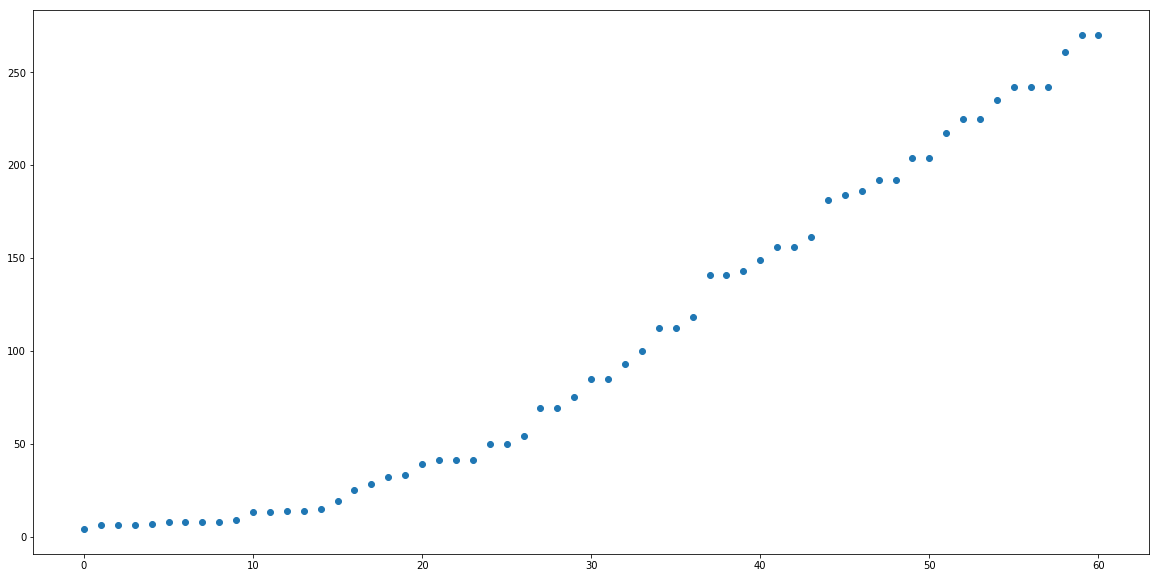

In [163]:
random_sample = np.random.randint(0, len(df_60_days))
#print(df_60_days.iloc[random_sample,:])
plt.figure(figsize=(20, 10))
plt.scatter(x=range(61), y=df_60_days.iloc[random_sample,:])

In [164]:
### plot for small number of deaths
df_low_death = df_60_days.sum(axis=1).sort_values().iloc[:10]
list_ind = list(df_low_death.index)
list_ind

[2311, 241, 421, 3061, 920, 210, 1130, 2194, 3111, 153]

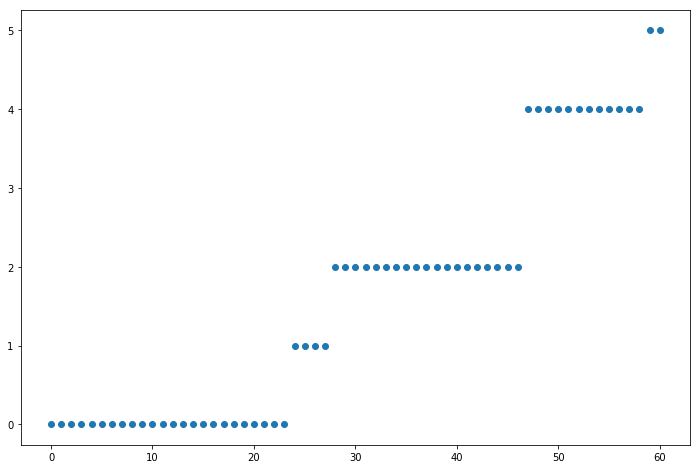

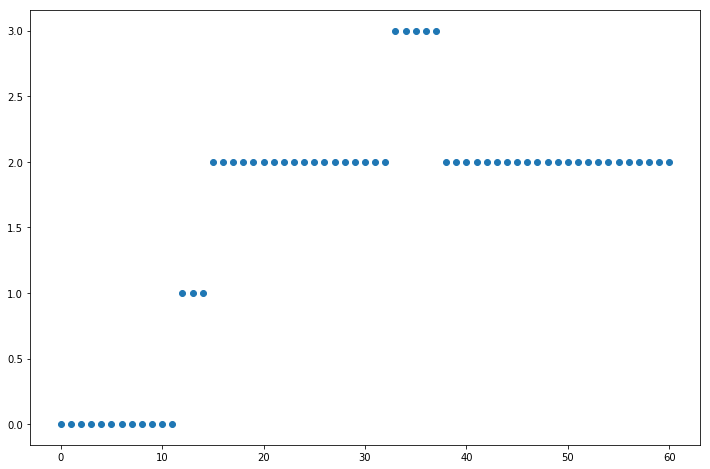

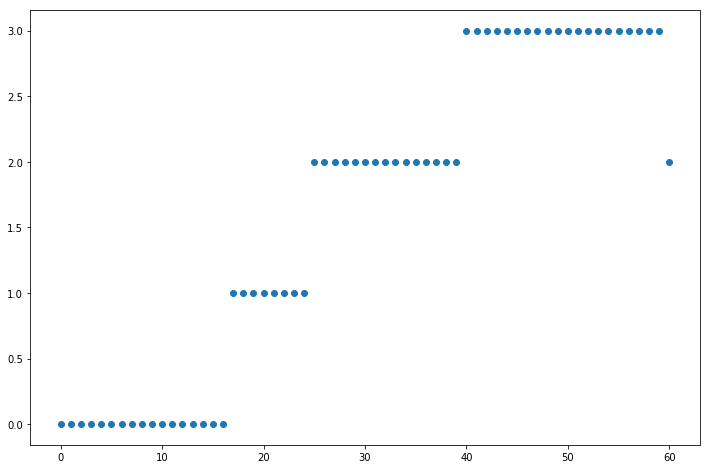

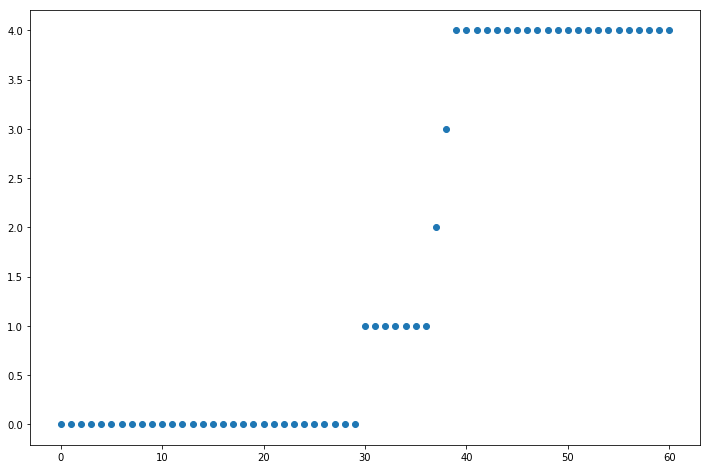

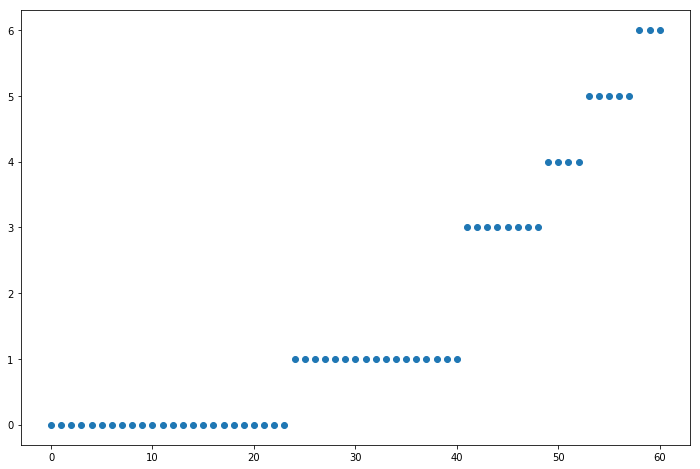

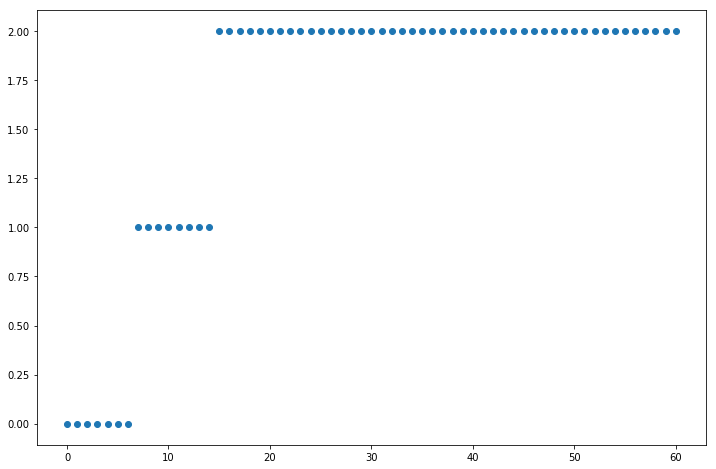

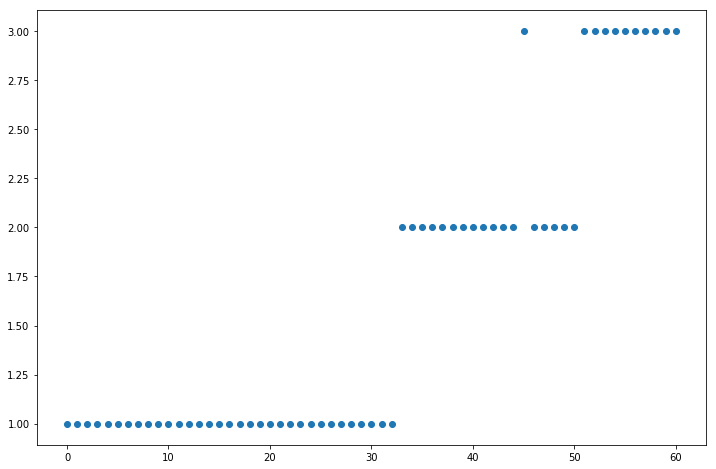

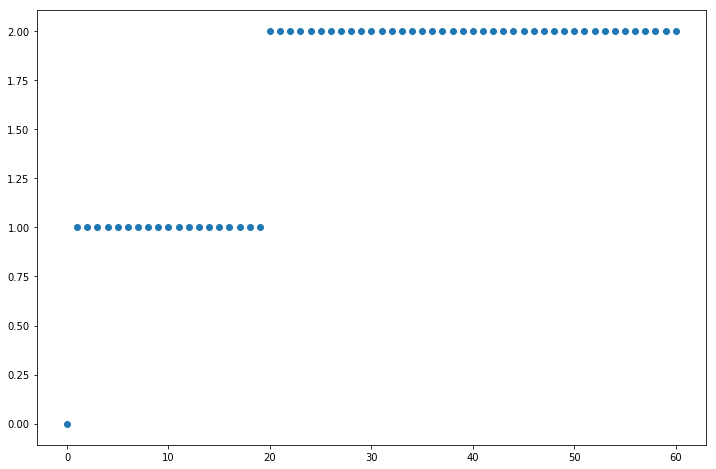

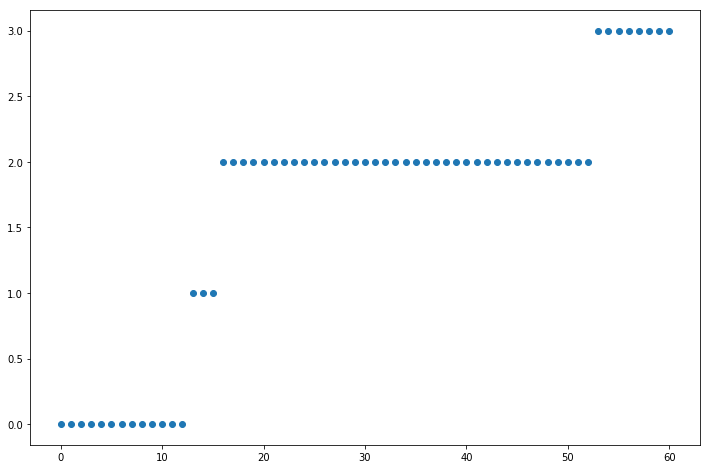

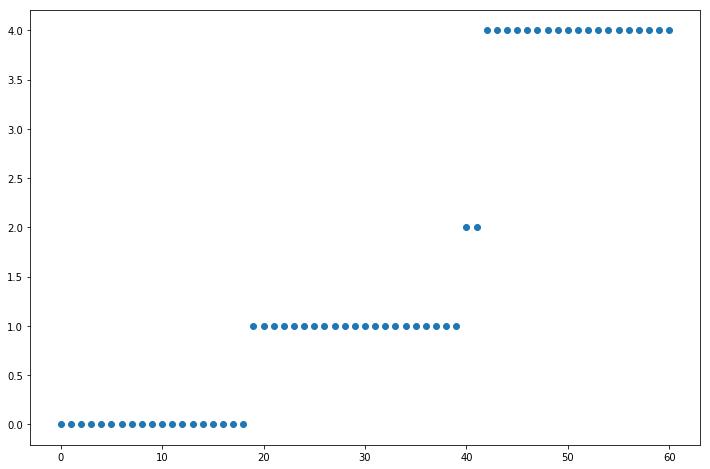

In [165]:
for i in list_ind: 
    plt.figure(figsize=(12, 8))
    plt.scatter(x=range(61), y=df_60_days.loc[i,:])

### Detecting outliers

In [166]:
z = np.abs(stats.zscore(df_60_days, axis=1))

In [167]:
z.shape

(862, 61)

In [168]:
outliers = np.where((z > 6))

In [169]:
outliers

(array([], dtype=int64), array([], dtype=int64))

In [170]:
print(len(df_60_days))
print(len(df_60_days_pop))

862
862


### rescaling using the population

In [171]:
scale_fact = df_60_days_pop['Population']/1e2
scale_fact.head()

1     1642.29
3    29334.08
4     1072.68
5      558.69
6     2232.34
Name: Population, dtype: float64

In [172]:
df_scaled = np.zeros((df_60_days.shape[0],df_60_days.shape[1]))
for j in range(df_60_days.shape[1]):
    df_scaled[:,j] = df_60_days.values[:,j]/scale_fact

In [173]:
df_scaled[0]

array([0.        , 0.00060891, 0.00060891, 0.00060891, 0.00060891,
       0.00060891, 0.00060891, 0.00060891, 0.00060891, 0.00060891,
       0.00121781, 0.00182672, 0.00182672, 0.00243562, 0.00243562,
       0.00243562, 0.00243562, 0.00243562, 0.00243562, 0.00243562,
       0.00243562, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453, 0.00304453, 0.00304453, 0.00304453, 0.00304453,
       0.00304453])

In [174]:
df_60_days.iloc[0,:]

3/21/20    0
3/22/20    1
3/23/20    1
3/24/20    1
3/25/20    1
3/26/20    1
3/27/20    1
3/28/20    1
3/29/20    1
3/30/20    1
3/31/20    2
4/1/20     3
4/2/20     3
4/3/20     4
4/4/20     4
4/5/20     4
4/6/20     4
4/7/20     4
4/8/20     4
4/9/20     4
4/10/20    4
4/11/20    5
4/12/20    5
4/13/20    5
4/14/20    5
4/15/20    5
4/16/20    5
4/17/20    5
4/18/20    5
4/19/20    5
          ..
4/21/20    5
4/22/20    5
4/23/20    5
4/24/20    5
4/25/20    5
4/26/20    5
4/27/20    5
4/28/20    5
4/29/20    5
4/30/20    5
5/1/20     5
5/2/20     5
5/3/20     5
5/4/20     5
5/5/20     5
5/6/20     5
5/7/20     5
5/8/20     5
5/9/20     5
5/10/20    5
5/11/20    5
5/12/20    5
5/13/20    5
5/14/20    5
5/15/20    5
5/16/20    5
5/17/20    5
5/18/20    5
5/19/20    5
5/20/20    5
Name: 1, Length: 61, dtype: int64

In [175]:
1 / 1642.29

0.0006089058570654391

In [176]:
2 / 1642.29

0.0012178117141308782

In [177]:
df_scaled.shape

(862, 61)

In [178]:
np.mean(df_scaled)

0.012819842420960473

In [179]:
np.max(df_scaled)

0.3098259073473001

In [180]:
arr_pop = df_60_days_pop['Population'].values
arr_pop.shape

(862,)

### saving data as a numpy_array. 

In [181]:
arr_path = "../../data/covid_preprocess_rescaled_862_samples.npy"
np.save(file=arr_path, arr=df_scaled)

In [182]:
pop_path = "../../data/covid_pop_862_samples.npy"
np.save(pop_path, arr_pop)

In [183]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#arr_transpose = np.transpose(final_arr)
#arr_transpose[:, 0]
#scaler = MinMaxScaler()
#arr_transpose_norm = scaler.fit_transform(arr_transpose)
#arr_transpose_norm[:,0]
#arr_transpose_norm[:,10]
#stand_scaler = StandardScaler()
#arr_transpose_norm_2 = stand_scaler.fit_transform(arr_transpose)
#arr_transpose_norm_2[:, 0]
#arr_transpose_norm_2[:, 10]

In [184]:
int(527*0.8)

421